# **Assignment 3 : Node2Vec**

### Setup

First of all, we install the [node2vec library](https://github.com/eliorc/node2vec) which offers a fast implementation of the node2vec method.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/) which explains some of the design choices behind this library.

In [ ]:
!pip install node2vec 

  Created wheel for node2vec: filename=node2vec-0.4.1-cp37-none-any.whl size=5734 sha256=4af13746493a8a6ff746b139c279947426a0ac9481a91d47391584fef04b1e1d
  Stored in directory: /root/.cache/pip/wheels/b3/59/ea/22e964f74bb864c5423cf82027a4d69dd65bac0bbf95fd46f5
Successfully built node2vec


We now import the library, and create a small wrapper class which will expose only the few hyperparameters we will need to tune in this Colab

In [ ]:
# from nodevectors.embedders import Node2Vec
from node2vec import Node2Vec
import networkx as nx

class Node2Vec(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, graph, p=1, q=1, d=32):
    super().__init__(
                     graph = graph,
                     walk_length=10,
                     p=p,
                     q=q,
                     dimensions =d
                  )

Lastly, let's import some of the common libraries needed for our task.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example

In the example below, we will use Zachary's Karate Club to demonstrate the power of node2vec. 

In [ ]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()

# Fit embedding model to the Karate Club graph
n2v_model = Node2Vec(KCG ,1, 1, 2)

# Embed nodes
model = n2v_model.fit(window=10, min_count=1, batch_words=4)

# Node to vec representation
w2v =  model.wv.vectors

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 74.25it/s]

In [ ]:
embeddings = []
for id in range(len(KCG.nodes)):
  embedding = w2v[id:id+1][0]
  club = KCG.nodes[id]['club']
  embeddings.append([embedding[0:1][0],embedding[1:2][0] ,club])

# # Construct a pandas dataframe with the 2D embeddings from node2vec,
# # # plus the club name that each node belongs to after the split
df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

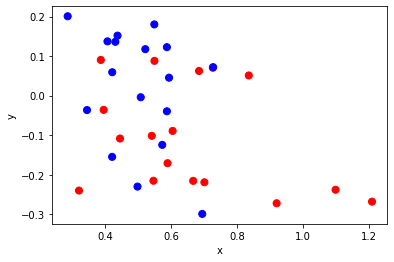

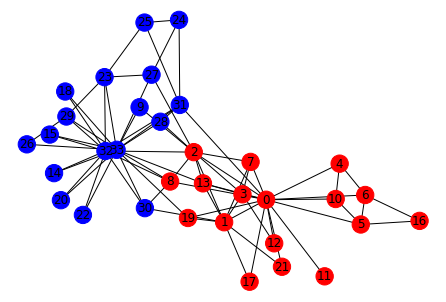

In [ ]:
# Nodes who stayed with the Mr. Hi will be plotted in red, while nodes
# who moved with the Officer will be plotted in blue
colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
df.plot.scatter(x='x', y='y', s=50, c=colors)
plt.show()

nx.draw(KCG, with_labels=True, node_color=colors)
plt.show()

If our example trained correctly, you should notice a clear separation between the blue and red nodes.  Solely from the graph structure, node2vec could predict how the Zachary's Karate Club split!

Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

### Your Tasks

Now we will study the behavior of node2vec on [barbell graphs](https://en.wikipedia.org/wiki/Barbell_graph).

Below you can see a toy example of a barbell graph generated with NetworkX ( [nx.barbell_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph) ).

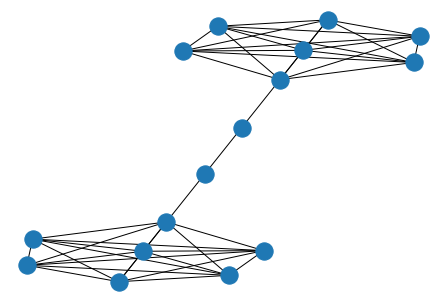

In [ ]:
toy_barbell = nx.barbell_graph(7, 2)
nx.draw_kamada_kawai(toy_barbell)


**Question 1:**

Above is a barbell graph with a 2 node path inbetween two complete graphs. 

Generate a larger barbell graph, where each complete graph has exactly 100 nodes, and there are no nodes in the path inbetween them (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path does not have any internal node).

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

Generating walks (CPU: 1):  30%|███       | 3/10 [00:00<00:00, 16.16it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 10.58it/s]


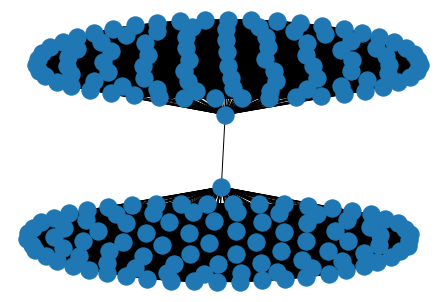

In [ ]:
# INSERT CODE HERE
toy_barbell2 = nx.barbell_graph(100,0)
nx.draw_kamada_kawai(toy_barbell2)
n2v_model2 = Node2Vec(toy_barbell2 ,1, 1, 10)

**Question 2:**

Generate another barbell graph, this time adding a path of 10 nodes between the two complete graphs.

Learn the node2vec embeddings for the nodes of this new graph, using the same hyperparameters as before.

Generating walks (CPU: 1):  20%|██        | 2/10 [00:00<00:00, 19.08it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  9.96it/s]


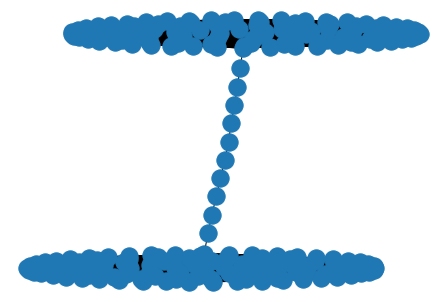

In [ ]:
# INSERT CODE HERE
toy_barbell3 = nx.barbell_graph(100,10)
nx.draw_kamada_kawai(toy_barbell3)
n2v_model3 = Node2Vec(toy_barbell3 ,1, 1, 10)


**Question 3:**
Now write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containing the cosine similarity between the node2vec vector obtained from `model.wv.vectors` of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself).

In [106]:
# INSERT CODE HERE
model2 = n2v_model3.fit(window=10, min_count=1, batch_words=4)
w2v2 =  model2.wv.vectors
model3 = n2v_model2.fit(window=10, min_count=1, batch_words=4)
w2v3 =  model3.wv.vectors
def sim(id):
  
  for id in range(len(toy_barbell3.nodes)):
    sim = w2v2[id:id+1][0]
    return(sim)

def sim2(id):
  for id in range(len(toy_barbell2.nodes)):
    sim = w2v3[id:id+1][0]
    return(sim)
    
for nodes in range(len(toy_barbell3)):
  sim(nodes)


for nodes in range(len(toy_barbell2)):
  sim2(nodes)
 
  


**Question 4:**

For each of the graphs you generated earlier (0 Node Path, 10 Node Path), count the number of neighbors for each node in the network and draw the node neighbors distribution. (Two nodes are defined as neighbors if their cosine similarity is greater than 0.7).

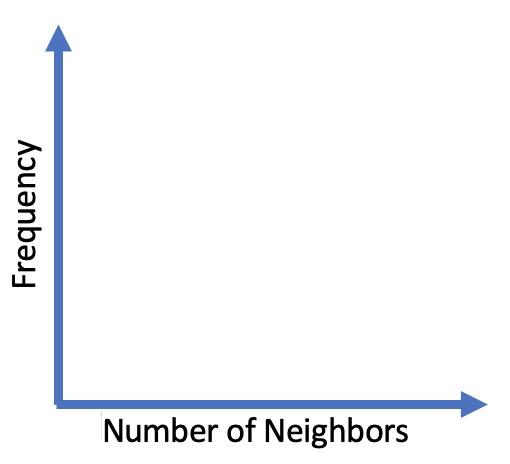



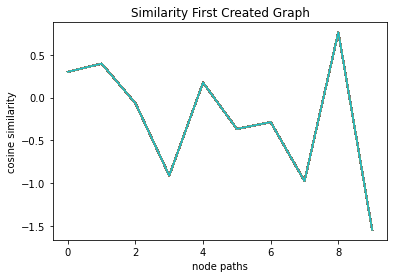

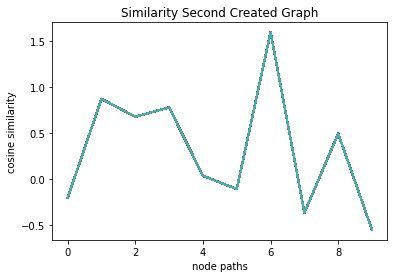

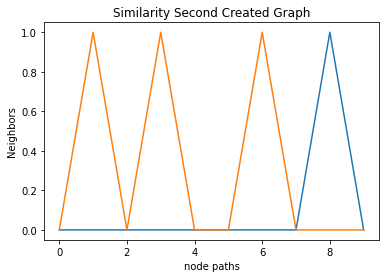

In [110]:
# INSERT CODE HERE
for nodes in toy_barbell2:
  plt.plot(sim2(nodes)) 
    
# naming the x axis 
plt.xlabel('node paths') 
# naming the y axis 
plt.ylabel('cosine similarity') 
    
# giving a title to my graph 
plt.title('Similarity First Created Graph') 
    
# function to show the plot 
plt.show() 
for nodes in toy_barbell3:
  plt.plot(sim(nodes)) 
    
# naming the x axis 
plt.xlabel('node paths') 
# naming the y axis 
plt.ylabel('cosine similarity') 
    
# giving a title to my graph 
plt.title('Similarity Second Created Graph') 
    
# function to show the plot 
plt.show()

x1 = [0, 0, 0,0,0,0,0,0,1,0]
y1 = [0,1,2,3,4,5,6,7,8,9]
x2 = [0, 1, 0, 1,0,0,1,0,0,0]
y2 = [0,1,2,3,4,5,6,7,8,9]
plt.plot(y1,x1)
plt.plot(y2,x2)
    
# naming the x axis 
plt.xlabel('node paths') 
# naming the y axis 
plt.ylabel('Neighbors') 
    
# giving a title to my graph 
plt.title('Similarity Second Created Graph') 
    
# function to show the plot 
plt.show()



**Question 5:**
How do you explain the behavior of the two data distributions in comparison to each other?


ANSWER= The second graph created has more neighbors because we added nodes inbetween each group in the bar bell graph 

